In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.engine import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

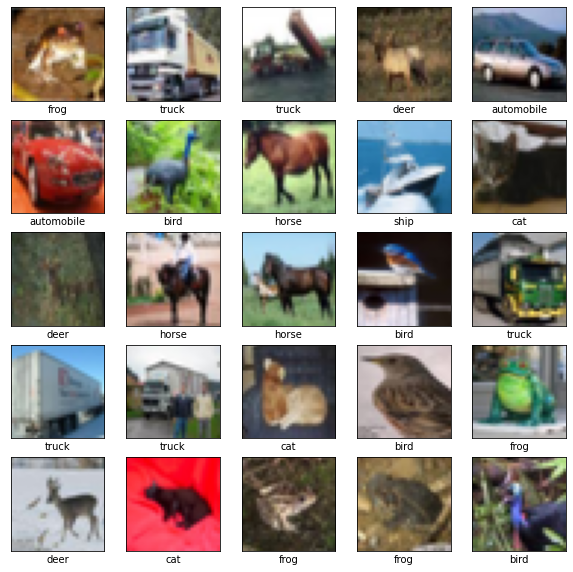

In [37]:
#Загрузка и нормализация датасета CIFAR-10
(train_images, train_labels), (valid_images, valid_labels) = datasets.cifar10.load_data()
train_images, valid_images = train_images / 255.0, valid_images / 255.0
valid_images, test_images, valid_labels, test_labels = train_test_split(valid_images, valid_labels, test_size=0.20, random_state=1)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
#2. Создание модели
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [4]:
#3. Обучение модели
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7265 - accuracy: 0.3545 - val_loss: 1.2377 - val_accuracy: 0.5562
Epoch 2/10
1563/1563 [==============================] - 66s 43ms/step - loss: 1.1801 - accuracy: 0.5778 - val_loss: 1.0577 - val_accuracy: 0.6212
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0073 - accuracy: 0.6466 - val_loss: 0.9682 - val_accuracy: 0.6606
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9002 - accuracy: 0.6833 - val_loss: 0.9498 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8120 - accuracy: 0.7156 - val_loss: 0.9030 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7611 - accuracy: 0.7335 - val_loss: 0.8566 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7117 - accuracy: 0.7521 - val_loss: 0.8492 -

250/250 - 3s - loss: 0.9217 - accuracy: 0.6952
0.6952499747276306


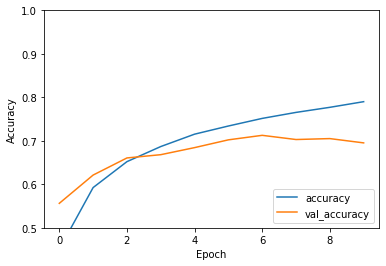

In [5]:
#4. Оценка модели
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
valid_loss, valid_acc = model.evaluate(valid_images,  valid_labels, verbose=2)
print(valid_acc)

In [6]:
#5. настройка архитектуры нейронной сети
modelNEW = models.Sequential()
modelNEW.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelNEW.add(layers.MaxPooling2D((2, 2)))
modelNEW.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelNEW.add(layers.MaxPooling2D((2, 2)))
modelNEW.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelNEW.add(layers.Dropout(0.2))
modelNEW.add(layers.Flatten())
modelNEW.add(layers.Dense(64, activation='relu'))
modelNEW.add(layers.Dense(10, activation='softmax'))
modelNEW.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [7]:
#6. Обучение новой модели
modelNEW.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
historyNEW = modelNEW.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7750 - accuracy: 0.3385 - val_loss: 1.2278 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2244 - accuracy: 0.5631 - val_loss: 1.0220 - val_accuracy: 0.6381
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0544 - accuracy: 0.6272 - val_loss: 0.9742 - val_accuracy: 0.6528
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9300 - accuracy: 0.6738 - val_loss: 0.8851 - val_accuracy: 0.6939
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8629 - accuracy: 0.6954 - val_loss: 0.8429 - val_accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8013 - accuracy: 0.7171 - val_loss: 0.8406 - val_accuracy: 0.7084
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7603 - accuracy: 0.7306 - val_loss: 0.8439 -

250/250 - 3s - loss: 0.8226 - accuracy: 0.7209
0.7208750247955322


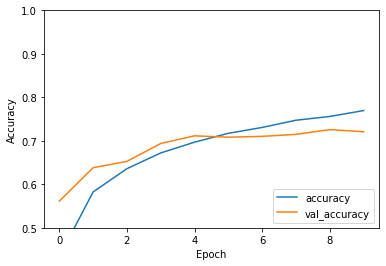

In [8]:
#7. Оценка настроенной модели
plt.plot(historyNEW.history['accuracy'], label='accuracy')
plt.plot(historyNEW.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
valid_loss, valid_acc = modelNEW.evaluate(valid_images,  valid_labels, verbose=2)
print(valid_acc)

[array([86]), array([39]), array([87]), array([22]), array([40])]


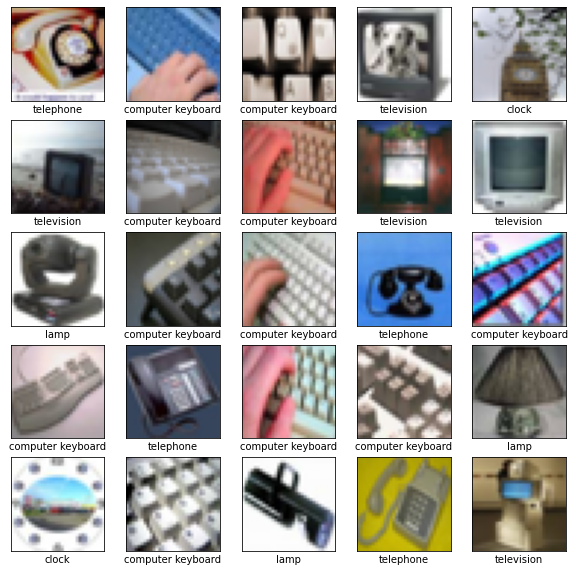

In [65]:
#8. Загрузка и нормализация объектов суперкласса household electrical devices из CIFAR-100
(train_images_coarse, train_labels_coarse), (valid_images_coarse, valid_labels_coarse) = datasets.cifar100.load_data('coarse')
(train_images_fine, train_labels_fine), (valid_images_fine, valid_labels_fine) = datasets.cifar100.load_data('fine')
train_images_dev = train_images_fine[(train_labels_coarse == 5).squeeze()]
train_labels_dev = train_labels_fine[(train_labels_coarse == 5).squeeze()]
unique = []
for number in train_labels_dev:
    if number in unique:
      continue
    else:
      unique.append(number)
print(unique)
train_labels_dev[train_labels_dev==[22]] = 10
train_labels_dev[train_labels_dev==[39]] = 11
train_labels_dev[train_labels_dev==[40]] = 12
train_labels_dev[train_labels_dev==[86]] = 13
train_labels_dev[train_labels_dev==[87]] = 14
valid_images_dev = valid_images_fine[(valid_labels_coarse == 5).squeeze()]
valid_labels_dev = valid_labels_fine[(valid_labels_coarse == 5).squeeze()]
valid_labels_dev[valid_labels_dev==[22]] = 10
valid_labels_dev[valid_labels_dev==[39]] = 11
valid_labels_dev[valid_labels_dev==[40]] = 12
valid_labels_dev[valid_labels_dev==[86]] = 13
valid_labels_dev[valid_labels_dev==[87]] = 14
train_images_dev, valid_images_dev = train_images_dev / 255.0, valid_images_dev / 255.0
valid_images_dev, test_images_dev, valid_labels_dev, test_labels_dev = train_test_split(valid_images_dev, valid_labels_dev, test_size=0.20, random_state=1)
class_names_dev = ['clock', 'computer keyboard', 'lamp', 'telephone', 'television']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_dev[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_dev[train_labels_dev[i][0]-10])
plt.show()

In [ ]:
print(test_images_dev)

In [66]:
#9.Соединение датасетов
class_names_all = np.concatenate((class_names, class_names_dev))
train_images_all = np.concatenate((train_images, train_images_dev))
valid_images_all = np.concatenate((valid_images, valid_images_dev))
test_images_all = np.concatenate((test_images, test_images_dev))
train_labels_all = np.concatenate((train_labels, train_labels_dev))
valid_labels_all = np.concatenate((valid_labels, valid_labels_dev))
test_labels_all = np.concatenate((test_labels, test_labels_dev))

In [70]:
#10. Дообучение с учетом новых объектов
for layer in modelNEW.layers:
	print("{}: {}".format(layer, layer.trainable))
last_model = modelNEW
for layer in last_model.layers:
	layer.trainable = False
left = last_model.layers[-3].output
x = layers.Dense(64, activation='relu') (left)
x = layers.Dense(15, activation='softmax') (x)
new_model = Model(last_model.input, x)
for layer in new_model.layers:
  print("{}: {}".format(layer, layer.trainable))
print(new_model.summary())
new_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
historyNEW_plus = new_model.fit(train_images_all, train_labels_all, epochs=10,validation_data=(valid_images_all, valid_labels_all))

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f101d0322b0>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f101d02b390>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f101d032208>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f101d03e470>: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1068c007b8>: False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f101cfedcc0>: False
<tensorflow.python.keras.layers.core.Flatten object at 0x7f1025d22ba8>: False
<tensorflow.python.keras.layers.core.Dense object at 0x7f1025d2f390>: False
<tensorflow.python.keras.layers.core.Dense object at 0x7f101d039048>: False
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f101d02b7f0>: True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f101d0322b0>: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f101d02b390>: False
<te

263/263 - 3s - loss: 0.9083 - accuracy: 0.7175
0.7174999713897705


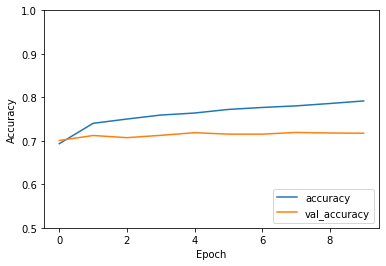

In [72]:
#11. Оценка дообученной модели
plt.plot(historyNEW_plus.history['accuracy'], label='accuracy')
plt.plot(historyNEW_plus.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
valid_loss, valid_acc = new_model.evaluate(valid_images_all,  valid_labels_all, verbose=2)
print(valid_acc)

In [73]:
#12. Оценка классификации изначальной CNN
predicted_labels_all = model.predict(test_images_all)
print(test_labels_all.shape)
print(predicted_labels_all.shape)
print(confusion_matrix(test_labels_all, np.argmax(predicted_labels_all, axis=1)))
print(classification_report(test_labels_all, np.argmax(predicted_labels_all, axis=1)))

(2100, 1)
(2100, 10)
[[170   6   8   3   1   0   0   3   8   6   0   0   0   0   0]
 [  4 163   2   2   2   1   0   0   6  11   0   0   0   0   0]
 [ 22   0 134  11   6   9   4   6   2   0   0   0   0   0   0]
 [ 12   1  20 108   8  44   3   7   3   4   0   0   0   0   0]
 [ 12   2  22  18 131  11   2  27   3   2   0   0   0   0   0]
 [  4   0  21  24   4 116   0  12   2   4   0   0   0   0   0]
 [  8   6  19  25   3  10 118   3   4   5   0   0   0   0   0]
 [  8   3  17   4   7   8   0 131   0   5   0   0   0   0   0]
 [ 14   8   1   2   0   0   0   1 167   8   0   0   0   0   0]
 [  8  22   1   3   2   1   0   3   2 156   0   0   0   0   0]
 [  2   6   5   7   0   0   2   0   2   1   0   0   0   0   0]
 [  4   1   4   5   0   0   1   2   3   2   0   0   0   0   0]
 [  2   1   4   2   1   3   0   0   0   2   0   0   0   0   0]
 [  1   1   3   2   0   4   0   1   0   3   0   0   0   0   0]
 [  1   1   5   2   0   3   0   0   2   9   0   0   0   0   0]]
              precision    recall

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#13. Оценка классификации улучшенной CNN
predicted_labels_all = modelNEW.predict(test_images_all)
print(test_labels_all.shape)
print(predicted_labels_all.shape)
print(confusion_matrix(test_labels_all, np.argmax(predicted_labels_all, axis=1)))
print(classification_report(test_labels_all, np.argmax(predicted_labels_all, axis=1)))

(2100, 1)
(2100, 10)
[[155   6   4   4   5   1   0   5  12  13   0   0   0   0   0]
 [  3 152   1   1   3   2   2   0   4  23   0   0   0   0   0]
 [ 20   1 107  10  18  13   6  13   2   4   0   0   0   0   0]
 [  3   2  10 110  14  42   1  18   3   7   0   0   0   0   0]
 [  3   2   7  16 146   6   4  41   2   3   0   0   0   0   0]
 [  2   1   7  25   7 111   1  26   3   4   0   0   0   0   0]
 [  1   2   7  18  14   6 141   6   3   3   0   0   0   0   0]
 [  4   0   5   5   3   7   0 153   0   6   0   0   0   0   0]
 [  7   5   0   0   2   0   0   1 173  13   0   0   0   0   0]
 [  5  11   1   3   0   0   1   3   2 172   0   0   0   0   0]
 [  3   2   0   4   0   3   3   0   3   7   0   0   0   0   0]
 [  3   2   1   1   4   0   3   2   4   2   0   0   0   0   0]
 [  1   1   3   1   1   4   1   1   1   1   0   0   0   0   0]
 [  3   0   0   0   0   2   0   2   1   7   0   0   0   0   0]
 [  1   2   3   6   0   0   1   0   0  10   0   0   0   0   0]]
              precision    recall

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#14. Оценка классификации улучшенной CNN
predicted_labels_all = new_model.predict(test_images_all)
print(test_labels_all.shape)
print(predicted_labels_all.shape)
print(confusion_matrix(test_labels_all, np.argmax(predicted_labels_all, axis=1)))
print(classification_report(test_labels_all, np.argmax(predicted_labels_all, axis=1)))

(2100, 1)
(2100, 15)
[[157   6   7   2   3   2   2   1  11  11   0   0   0   2   1]
 [  4 164   2   0   1   1   2   1   5  10   0   0   1   0   0]
 [ 18   1 120   9  13  10   9  10   2   0   0   0   0   1   1]
 [  2   2  11 101  15  50   7  11   6   2   0   0   0   2   1]
 [  2   1   9   8 160   8  12  24   0   3   0   1   1   0   1]
 [  4   1  10  22   6 117   8  13   2   1   0   0   2   0   1]
 [  2   0   9   9   5   2 168   1   2   2   0   1   0   0   0]
 [  5   0   5   4   5   5   2 150   1   2   0   0   0   2   2]
 [  8   7   0   3   2   0   1   1 169   9   0   1   0   0   0]
 [  5  15   1   1   0   1   1   4   4 165   0   0   0   1   0]
 [  2   1   2   2   0   3   3   0   3   2   5   0   0   1   1]
 [  5   0   1   1   2   0   2   1   2   1   0   7   0   0   0]
 [  0   0   2   1   0   3   1   1   2   0   0   0   5   0   0]
 [  0   1   1   0   0   1   0   0   0   3   1   0   0   6   2]
 [  0   0   0   4   0   1   0   0   0   2   0   0   0   2  14]]
              precision    recall